In [2]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [5]:
import PDFfield
import PDFmodel

### Regeneration:

In [6]:
### uncomment the following cells to force regeneration (takes about 20 minutes / file)
### there's no need to do it unless higher resolution is needed..
helium  = 4
oxygen  = 16
iron    = 56
uranium = 238

In [7]:
# If you want to fetch a rendered model
# Happens nearly instantly.
PDFdict = PDFfield.precompute(iron, 20e18)

In [8]:
#PDFdict = PDFfield.precompute(helium, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(helium, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(helium, 200e18, autoload=False)

In [9]:
#PDFdict = PDFfield.precompute(oxygen, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(oxygen, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(oxygen, 200e18, autoload=False)

In [10]:
#PDFdict = PDFfield.precompute(iron, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(iron, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(iron, 200e18, autoload=False)

In [11]:
#PDFdict = PDFfield.precompute(uranium, 2e18, autoload=False)
#PDFdict = PDFfield.precompute(uranium, 20e18, autoload=False)
#PDFdict = PDFfield.precompute(uranium, 200e18, autoload=False)

In [12]:
PDFdict.keys()

['y', 'x', 'z', 'PDF']

In [13]:
PDFdict['x'].shape

(120L,)

In [14]:
PDFdict['PDF'].shape

(120L, 120L, 120L)

# Performance race

In [31]:
import random
import time

def interpolate(positions):
    start = time.time()
    for position in positions:
        position = np.array(position)
        pdf = PDFfield.cartesianPDF(position, iron, 20e18)
    return time.time() - start

def compute(positions):
    start = time.time()
    for position in positions:
        position = np.array(position)
        pdf = PDFmodel.pdf(position, iron, 20e18)
    return time.time() - start


In [34]:
spacelimit = 6
samples = 10000
np.random.seed(12345)
x = np.random.uniform(-spacelimit, spacelimit, samples)
y = np.random.uniform(-spacelimit, spacelimit, samples)
z = np.random.uniform(-spacelimit, spacelimit, samples)

positions = np.array(zip(x, y, z))
int_time = interpolate(positions)
comp_time = compute(positions)

print 'computational time for {} samples: {} [seconds]'.format(samples,comp_time)
print 'interpolation time for {} samples: {} [seconds]'.format(samples,int_time)
print 'performance ratio (comp/interp): {:.3}x'.format(comp_time/float(int_time))

C:\Users\EricK\crayfis\GZ\python\PDFmodel.py:49: RuntimeWarning: overflow encountered in exp
  return 7.8e7 * (1./rs_AU**2) * ( Es_eV**2 / ( np.exp(Es_eV/.5) - 1. ) )


computational time for 10000 samples: 4.57800006866 [seconds]
interpolation time for 10000 samples: 2.46900010109 [seconds]
performance ratio (comp/interp): 1.85x


# Z vs Y Field near sun

In [19]:
# Z-Y meridian plane (x = 0)
Ro = 0.00465 # radius of Sun in [AU]
w = 50.* Ro
Z, Y = np.mgrid[-w:w:500j,-w:w:500j]
z = Z.flatten()
y = Y.flatten()
size = z.size
x = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Z.shape)

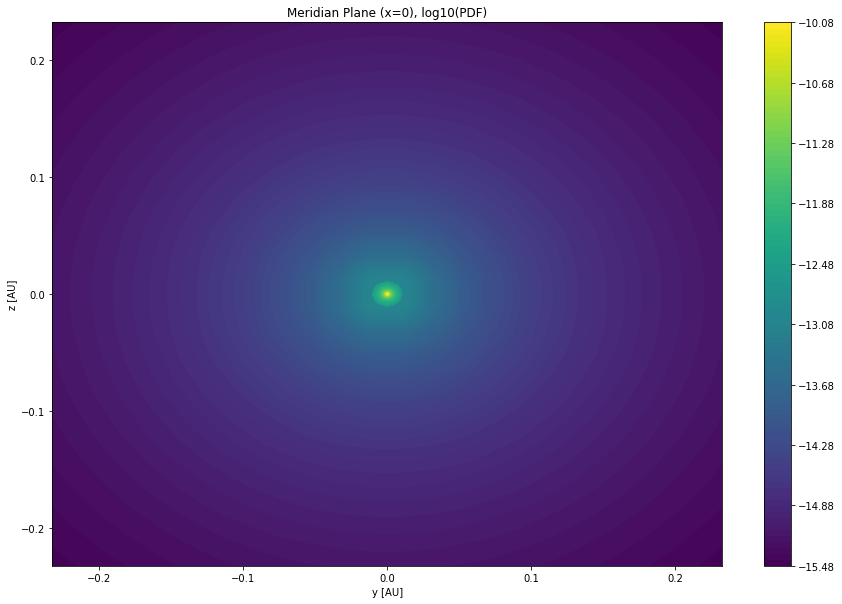

In [25]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually y-axis
plt.ylim(-w,w) # actually z-axis
plt.xlabel('y [AU]')
plt.ylabel('z [AU]')
plt.title('Meridian Plane (x=0), log10(PDF)')
c = plt.contourf(Y,Z,np.log10(PDF),100)
plt.colorbar(c)

# Y vs X near sun

In [26]:
# Y-X equitorial plane (z = 0)
Ro = 0.00465 # radius of Sun in [AU]
w = 50.* Ro
Y, X = np.mgrid[-w:w:500j,-w:w:500j]
y = Y.flatten()
x = X.flatten()
size = z.size
z = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Y.shape)

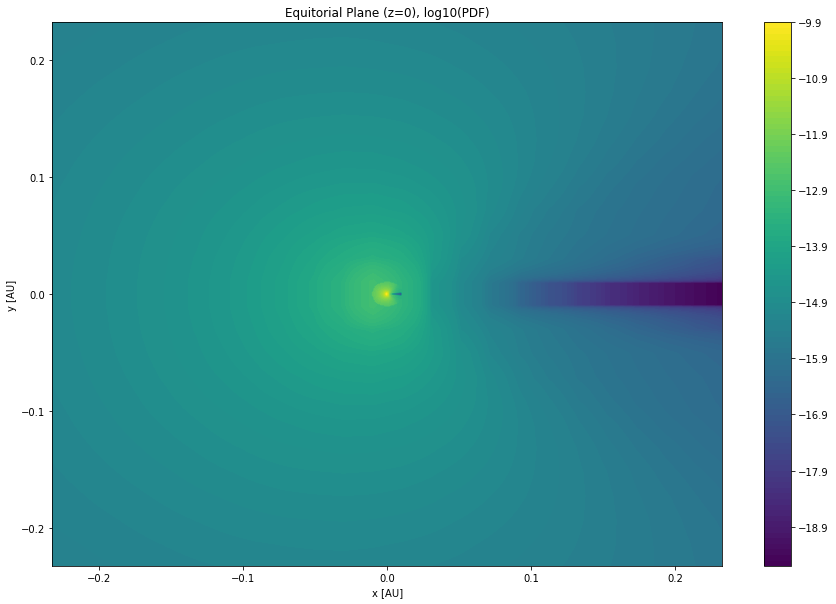

In [28]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually x-axis
plt.ylim(-w,w) # actually y-axis
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Equitorial Plane (z=0), log10(PDF)')
c = plt.contourf(X,Y,np.log10(PDF),100)
plt.colorbar(c)

# Equitorial Plane

In [29]:
# Y-X equitorial plane (z = 0)
w = 6.
Y, X = np.mgrid[-w:w:500j,-w:w:500j]
y = Y.flatten()
x = X.flatten()
size = z.size
z = np.zeros(size)

pdf = np.zeros(size)
for i, (ix, iy, iz) in enumerate(zip(x, y, z)):
    position = np.array([ix, iy, iz])
    pdf[i] = PDFfield.cartesianPDF(position, iron, 20e18)

PDF = pdf.reshape(Y.shape)

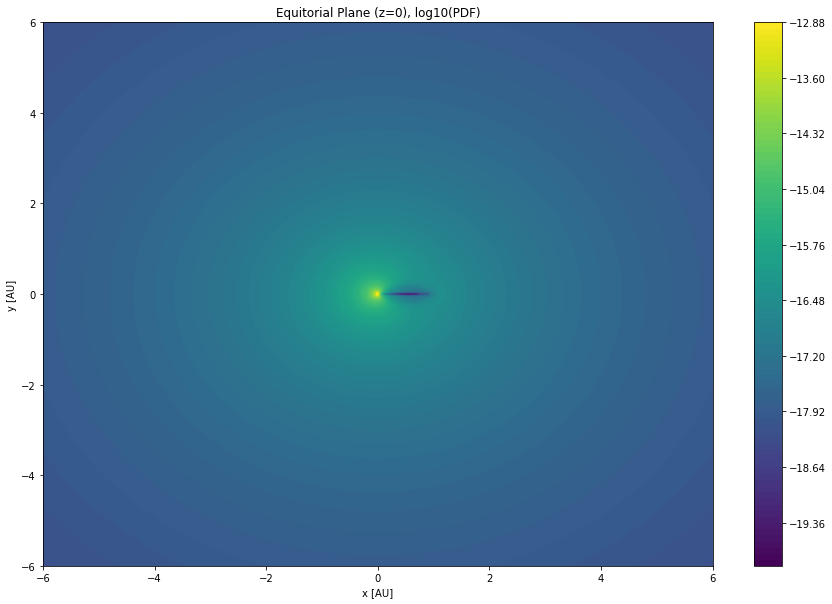

In [30]:
# plot it
plt.figure(figsize=(15,10))
plt.xlim(-w,w) # actually x-axis
plt.ylim(-w,w) # actually y-axis
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Equitorial Plane (z=0), log10(PDF)')
c = plt.contourf(X,Y,np.log10(PDF),100)
plt.colorbar(c)